# PR Assignment 2
## Garima Jain
## Mtech AI, 18MCMI14

### Q1. Implement dimensionality reduction techniquessuch as Principal Component Analysis (PCA) and Fisher’s Linear Discriminant Analysis (LDA) using your own code.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [51]:
def get_eigen_vec_mat(mat, components):
    # components
    eig_val, eig_vec = np.linalg.eig(mat)
    features = len(eig_val)
    d = {}
    for i in range(features):
        d.update({eig_val[i]: eig_vec[:, i]})
    sorted(d, key=lambda k: d[k][1], reverse=True)
    # print(d.values())
    eig_vec_mat = np.array(list(d.values()))
    return eig_val, eig_vec_mat[:components]

In [52]:
def pca(data, components=3):
    mean_vec = np.mean(data, axis=0)
    mean_centered = data - mean_vec
    cov_mat = np.cov(mean_centered.T)
    return get_eigen_vec_mat(cov_mat, components)

In [53]:
def fld(X, data, labels, features, classes):
    """
    X - actual data (#samples x #features)
    data - list of class wise data lists
    labels - list of class wise labels
    features - #features
    classes - #classes
    """

    class_mean_vec = []  # size = #class x #features
    for class_data in data:
        class_mean_vec.append(np.mean(class_data, axis=0))
    class_mean_vec = np.array(class_mean_vec)
    mean_vec = np.mean(class_mean_vec, axis=0).reshape(features, 1)  # feature wise mean of entire dataset
    class_sizes = []
    for i in range(classes):
        class_sizes.append(len(labels[i]))

    # calculate Between class matrix
    Sb = np.zeros((features, features))  # store num of data samples in each class
    for i in range(classes):
        Sb += class_sizes[i] * np.dot((class_mean_vec[i] - mean_vec), (class_mean_vec[i] - mean_vec).T)
    Sw = np.zeros((features, features))

    for i in range(len(data)):
        Sw += np.dot((data[i] - class_mean_vec[i]).T, data[i] - class_mean_vec[i])

    mat = np.dot(np.linalg.inv(Sw), Sb)
    return get_eigen_vec_mat(mat, 1)


### Q2. Apply PCA and LDA on IRIS dataset. Show projection of the original data in PCA space (PC1 versus PC2; PC1 versus PC3 and PC2 versus PC3) and 1-dimensional LDA space. Please label each point with their class labels for better visualization. Now, comment on the similarities and differences of results obtained in these two approaches.

In [54]:
def plot_PCA(x, y, c, title, xlabel, ylabel):
    iris = load_iris()
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
    plt.title(title)
    plt.scatter(x=x, y=y, c=c)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.legend()
    plt.show()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [55]:
def plot_fld(data, labels):
    # plt.title(title)
    y_axis = np.zeros((50, 1))
    plt.scatter(x=data[0:50], y=y_axis, c="b", label=labels[0])
    plt.scatter(x=data[50:100], y=y_axis, c="r", label=labels[1])
    plt.scatter(x=data[100:150], y=y_axis, c="g", label=labels[2])
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


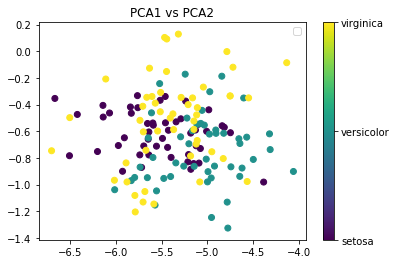

No handles with labels found to put in legend.


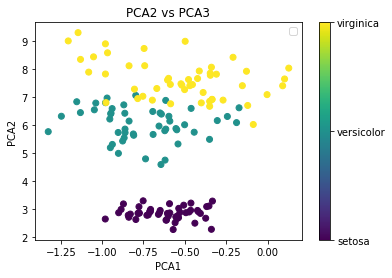

No handles with labels found to put in legend.


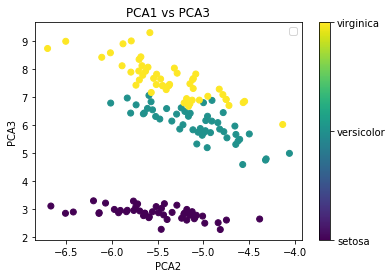

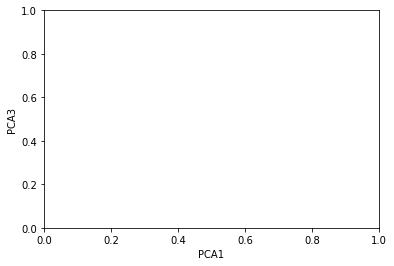

In [56]:
iris_data = load_iris()
data = iris_data['data']
class_labels = iris_data['target']
target_names = iris_data['target_names']
eig_val, W = pca(data)
transformed_data = np.dot(W, data.T).T
plot_PCA(x=transformed_data[:, 0], y=transformed_data[:, 1], c=class_labels, title='PCA1 vs PCA2', xlabel='PCA1', ylabel='PCA2')
plot_PCA(x=transformed_data[:, 1], y=transformed_data[:, 2], c=class_labels, title='PCA2 vs PCA3', xlabel='PCA2', ylabel='PCA3')
plot_PCA(x=transformed_data[:, 0], y=transformed_data[:, 2], c=class_labels, title='PCA1 vs PCA3', xlabel='PCA1', ylabel='PCA3')


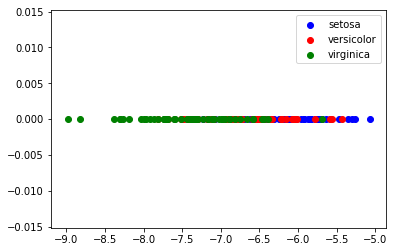

In [57]:
iris_data = load_iris()
data = iris_data['data']
class_labels = iris_data['target']
target_names = iris_data['target_names']
data1 = [data[:50, :], data[50:100, :], data[100:150, :]]
labels = [class_labels[0:50], class_labels[50:100], class_labels[100:150]]

eig_val, W = fld(X=data, data=data1, labels=labels, features=4, classes=3)
transformed_data = np.dot(W, data.T).T
plot_fld(data=transformed_data, labels=target_names)

### Q3. Apply PCA to a high dimensional datasetsuch as UCI Arcene cancer classification data.Generate the Scree Plot. Comment on how many components to choose for explaining 85%, 90%, 95% and 99% of the variance of the data. Project the data into first two PCs as well as 1-dimensional LDA space (To avoid clutter,plot only 10% of the data but equal number from each class. Use class labels on the data points to visualize better) and comment on the “representation” of the data in the lower dimensional subspace.

The data has 10,000 features and 100 samples. Since number of features is lot more than number of samples, Dual PCA is applied.

In [58]:
def get_variance(eig_val, var_percent):
    features = len(eig_val)
    eigv_sum = sum(eig_val)
    var = list(np.cumsum(eig_val) / eigv_sum * 100)
    num_of_components = []
    for percent in var_percent:
        for b in var:
            if b >= percent:
                num_of_components.append(var.index(b)+1)
                break
    for i in range(len(var_percent)):
        print("Number of components required to cover "+str(var_percent[i]) + "% of variance in data : "+ str(num_of_components[i]))

In [59]:
'''
variance% explained by PCs , x-axis: PCs, y-axis: variance%
'''
def scree_plot(data, labels):
    data = data.T # apply dual PCA
    features = data.shape[1]
    pca_eig_val, pca_eig_vec = pca(data, components=100)
    plt.plot(np.arange(features) + 1, pca_eig_val, 'ro-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigen Values')
    return pca_eig_val   

Number of components required to cover 85% of variance in data : 3
Number of components required to cover 90% of variance in data : 5
Number of components required to cover 95% of variance in data : 14
Number of components required to cover 99% of variance in data : 70


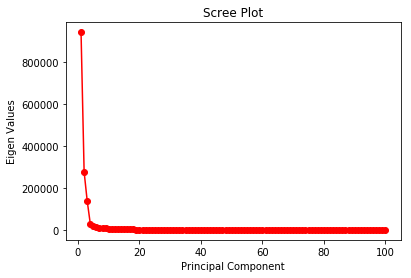

In [60]:
file = open('arcene_train.data')
trainData = np.array([list(map(int, file.readline().strip().split(' '))) for _ in range(100)])
file = open('arcene_train.labels')
trainLables = np.array([int(file.readline().strip()) for _ in range(100)])

class1 = trainData[trainLables == 1]
class2 = trainData[trainLables == -1]
class1_label = np.full(shape=(1, class1.shape[0]), fill_value=1)
class2_label = np.full(shape=(1, class2.shape[0]), fill_value=-1)

data = np.vstack((class1, class2))
labels = np.vstack((class1_label.T, class2_label.T))
eig_val = scree_plot(data, labels)

var_percent = [85, 90, 95, 99]
get_variance(eig_val, var_percent)

Projecting points in 1-D LDA space with 10% of data, equal points from each class.

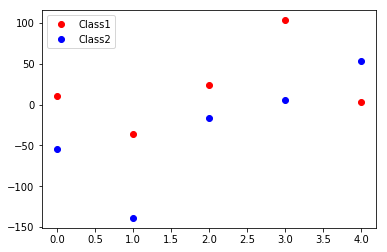

In [61]:
class1 = class1[:5,:].T
class2 = class2[:5,:].T
data = np.vstack((class1, class2))

class1_label = class1_label[:,:5]
class2_label = class2_label[:,:5]
data1 = [list(class1), list(class2)]
labels = [list(class1_label), list(class2_label)]
features = class1.shape[1]
eig_val, W = fld(X=data, data=data1, labels=labels, features=features, classes=2)
transformed_data = np.dot(W, data.T).T
plt.plot(transformed_data[0:5],'ro', label='Class1')
plt.plot(transformed_data[5:10],'bo', label='Class2')
plt.legend()
plt.show()

### Q4. Use kernel PCA (kPCA) and Local Linear Embedding (LLE) from any python package(for example, scikit-learn)on synthetic datasets (such as 3D swissrolldataset). Compare the results from your PCA with those of kPCA and LLE. You can also experiment by introducing punctures in the swiss roll manifold to see what ordinary PCA versus kPCA and LLE do to this data in 2D projection

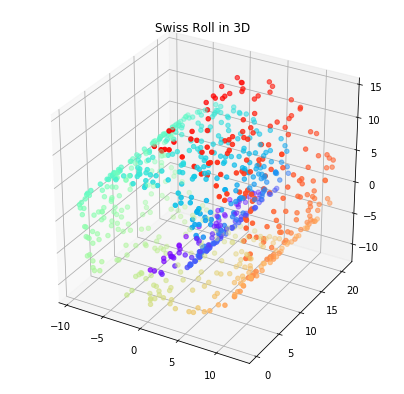

In [62]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_swiss_roll
from sklearn.manifold import locally_linear_embedding
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA, PCA


X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

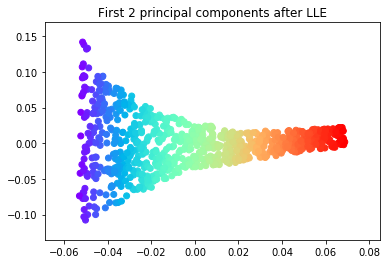

In [63]:
X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)

plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after LLE')
plt.show()

(800, 3)
(800, 2)


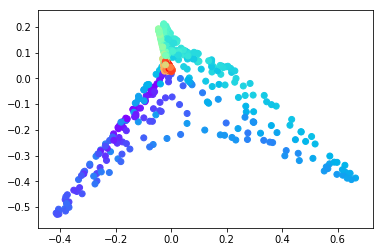

In [64]:
kpca = KernelPCA(kernel="rbf",gamma=0.1 ,n_components=2)
print(X.shape)
X_kpca = kpca.fit_transform(X)
print(X_kpca.shape)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap=plt.cm.rainbow)
plt.show()

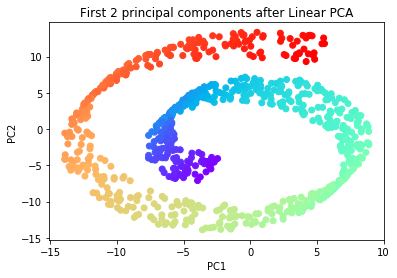

In [65]:
eig_val, W = pca(X, 2)
X_pca = np.dot(W, X.T).T
plt.scatter(X_pca[:,0], X_pca[:,1], c=color, cmap=plt.cm.rainbow)
plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Comments:
LLE:

    LLE method is able to find a good separation between the data.
    We can see that it is successful in unrolling the swiss roll.
    This method gives the best result of all the three.

KPCA

    KPCA with the rbf kernel is used.
    A gamma of 0.1 gives the best results
    A lot of data points are still close to each other.

PCA

    PCA performs the worst.
    A projection in the first two components is not able to unroll the data.
    Most of the data points just overlap with each other.
    It becomes a roll in the 2d space.

